In [1]:
%matplotlib inline

In [2]:
!pip install researchpy

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from matplotlib.pyplot import figure
#from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import skew, kurtosis
# Import a scoring metric to compare methods

from sklearn import datasets

#for t test
import scipy.stats as st
import researchpy as rp


# Exploring World Happiness

## Is there a link between happiness and population density?


#### Author: Yana Stamenova
#### Date: 26.07.2019

## *Abstract*

The main purpose of the author is to explore the paths for good data cleaning and tyding. Together with this, visualizations are made so the data can be more accessible to the reader. Finally the data is analyzed and t-tests are used for accepting/rejecting of hypothesis/ questions asked about the correlations between the data sets. 


## *Used Abbreviations*

- **HLE** - Healthy life expectancy
- **SD** - Standard deviation
- **WB** - World Bank
- **est.** - estimate
- **HI** - household income
- **GWP** - Gallup World Poll

## *Introduction*

The basic idea of this project is to explore the world happiness report, as it is calculated based on set of variables. What makes people happy and where do the happiest people live? We will also explore additional data about population density in different countries to see what is, if there is any, correlation between happiness and more space.

In [4]:
#start with reading the data
world_happiness = pd.read_excel("world_happiness_report_2019.xls", sheet_name = "Table2.1")
world_happiness.dtypes

Country name                                                 object
Year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [5]:
#Everythin looks fine
world_happiness.shape

(1704, 26)

In [6]:
world_happiness.sample(2)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
357,Costa Rica,2013,7.158000,9.549330,0.902069,70.300003,0.897879,0.021019,0.812863,0.850213,...,0.493,0.490882,0.489893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,United Kingdom,2018,7.233445,10.596948,0.928484,72.300003,0.837508,0.221998,0.404276,0.783172,...,NaN,0.341083,0.417473,NaN,NaN,NaN,0.304498,NaN,0.300558,NaN


### *Explanation of Variables:*

According to the source (*add link*), the data set does not make use of any imputed missing values in the happiness rankings. The only place such imputation is used is for decomposing a country’s average ladder score into components explained by six hypothesized underlying determinants **(*GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption*)**. A small number of countries have missing values in one or more of these factors. More information in the [link](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf).

#### Life ladder

**Happiness score** or **subjective well-being** (variable name *ladder*): The survey measure is from the January, 2019 release of the Gallup World Poll (GWP) covering years from 2005 to 2018. Unless stated otherwise, it is the national average response to the question of life evaluations. 

The English wording of the question is:
**“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?”**

This measure is also referred to as *Cantril life ladder*, or just *life ladder* as it is in the dataset.

1. Log GDP per capita 

The statistics of **GDP per capita** in purchasing power parity (PPP) at constant 2011 international dollar prices are from the November 14, 2018 update of the World Development Indicators (WDI). GDP per capita in 2018 are not yet available as of December 2018. The data is extended from 2017 to 2018, using countryspecific forecasts of real GDP growth in 2018 from different sources.

2. Social support  

The national average of Yes/No (1/0) answers to the question *If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?*

3. Healthy life expectancy at birth

**Healthy life expectancies** (HLE) at birth are based on the data extracted from the World Health Organization’s (WHO) Global Health Observatory data repository.

4. Freedom to make life choices

The national average of responses to the question *Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?*

5. Generosity    

The residual of regressing national average of response to the question *Have you donated money to a charity in the past month?* on GDP per capita.

6. Perceptions of corruption              

The measure is the national average of the survey responses to two questions in the GWP: *Is corruption widespread throughout
the government or not* and *Is corruption widespread within businesses or not?* The overall perception is just the average of the two 0-or-1 responses.

- Positive affect - defined as the average of three positive affect measures in GWP: happiness, laugh and enjoyment.                                          
- Negative affect - defined as the average of three negative affect measures in GWP: worry, sadness and anger.                                            
- Confidence in national government 

- Democratic Quality        

- Delivery Quality 

- Standard deviation of ladder by country-year - Alternative measures of inequality in happiness scores.                
- Standard deviation/Mean of ladder by country-year - Alternative measures of inequality in happiness scores.

- GINI index (World Bank estimate) - GINI index from the World Bank from the World Development Indicators.                     
- GINI index (World Bank estimate), average 2000-16           
- gini of household income reported in Gallup, by wp5-year - Gini of household income    
 
- Most people can be trusted - Variables in the expanded data set: The question’s English wording is “Generally speaking, would you say that most people can be trusted or that you have to be careful in dealing with people?” This indicator has a limited coverage. 

More information about the report variables can be found [here.](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf)


It is a good idea to make our column labels more Python friendly. This could be useful for our work ahead.

In [7]:
world_happiness.rename(columns={
    "Country name":"country_name",
    "Year": "year",
    "Life Ladder": "life_ladder",
    "Log GDP per capita" :"log_GDP_per_capita",
    "Social support"  :"social_support",
    "Healthy life expectancy at birth" : "HLE_at_birth",
    "Freedom to make life choices" : "freedom_to_make_life_choices",
    "Generosity" :"generosity",
    "Perceptions of corruption"  : "perceptions_of_corruption",
    "Positive affect"  : "positive_affect",
    "Negative affect"  : "negative_affect",
    "Confidence in national government"  : "confidence_in_national_government",
    "Democratic Quality" : "democratic_quality",
    "Delivery Quality" : "delivery_quality",
    "Standard deviation of ladder by country-year" : "SD_of_ladder_by_country_year",
    "Standard deviation/Mean of ladder by country-year" : "SD_mean_of_ladder_by_country_year",
    "GINI index (World Bank estimate)" : "GINI_index_WB_est",
    "GINI index (World Bank estimate), average 2000-16": "GINI_index_WB_est_average_2000_16",
    "gini of household income reported in Gallup, by wp5-year" : "GINI_HI_wp5_year",
    "Most people can be trusted, Gallup" : "most_people_can_be_trusted",
    "Most people can be trusted, WVS round 1981-1984" : "most_people_can_be_trusted_1981_1984",
    "Most people can be trusted, WVS round 1989-1993" : "most_people_can_be_trusted_1989_1993",
    "Most people can be trusted, WVS round 1994-1998" : "most_people_can_be_trusted_1994_1998",
    "Most people can be trusted, WVS round 1999-2004" : "most_people_can_be_trusted_1999_2004",
    "Most people can be trusted, WVS round 2005-2009" : "most_people_can_be_trusted_2005_2009",
    "Most people can be trusted, WVS round 2010-2014" : "most_people_can_be_trusted_2010_2014"

}, inplace = True)

In [8]:
world_happiness.sample()

,country_name,year,life_ladder,log_GDP_per_capita,social_support,HLE_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,...,GINI_index_WB_est,GINI_index_WB_est_average_2000_16,GINI_HI_wp5_year,most_people_can_be_trusted,most_people_can_be_trusted_1981_1984,most_people_can_be_trusted_1989_1993,most_people_can_be_trusted_1994_1998,most_people_can_be_trusted_1999_2004,most_people_can_be_trusted_2005_2009,most_people_can_be_trusted_2010_2014
1109,Niger,2013,3.71633,6.77317,0.695814,50.959999,0.825387,-0.064,0.710963,0.6502,...,NaN,0.36875,0.390307,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that the floating value variables "fill" the dataset a little bit too much. We need to fix this, to make it more clear and easy to read.

In [9]:
world_happiness = world_happiness.round(3)
world_happiness.sample()

,country_name,year,life_ladder,log_GDP_per_capita,social_support,HLE_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,...,GINI_index_WB_est,GINI_index_WB_est_average_2000_16,GINI_HI_wp5_year,most_people_can_be_trusted,most_people_can_be_trusted_1981_1984,most_people_can_be_trusted_1989_1993,most_people_can_be_trusted_1994_1998,most_people_can_be_trusted_1999_2004,most_people_can_be_trusted_2005_2009,most_people_can_be_trusted_2010_2014
1003,Moldova,2018,5.682,8.592,0.892,65.0,0.824,-0.034,0.929,0.582,...,NaN,0.326,0.401,NaN,NaN,NaN,0.218,0.141,0.176,NaN


Now, lets see how much data we have in terms of Years:

In [10]:
world_happiness.groupby("year").count().T 

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country_name,27,89,102,110,114,124,146,142,137,145,143,142,147,136
life_ladder,27,89,102,110,114,124,146,142,137,145,143,142,147,136
log_GDP_per_capita,27,89,102,110,113,123,145,140,136,143,139,139,143,127
social_support,27,89,100,110,113,120,145,142,137,142,142,142,146,136
HLE_at_birth,27,89,102,110,113,123,142,138,134,142,140,139,145,132
freedom_to_make_life_choices,25,86,101,107,112,122,145,141,136,138,140,140,146,136
generosity,1,81,102,109,113,123,144,133,133,139,138,138,142,126
perceptions_of_corruption,25,83,98,107,111,119,138,132,130,136,133,131,136,129
positive_affect,26,89,101,108,113,120,145,142,135,141,142,142,146,135
negative_affect,26,88,102,110,113,120,146,142,137,142,142,142,146,135


In [11]:
world_happiness.isna().values.sum()

11398

The information above gives us goose bumps since some variables have very few non-null values. But let's see it in more detail. From the table above we can see there are certain variables which contain very few values during the years. We can prove it with the code below.

In [12]:
#create list with the column names
column_names = world_happiness.columns

#print the missing values in each column
for i in column_names:
    print("{}: {}".format(i, world_happiness[i].isnull().sum()))

country_name: 0
year: 0
life_ladder: 0
log_GDP_per_capita: 28
social_support: 13
HLE_at_birth: 28
freedom_to_make_life_choices: 29
generosity: 82
perceptions_of_corruption: 96
positive_affect: 19
negative_affect: 13
confidence_in_national_government: 174
democratic_quality: 146
delivery_quality: 145
SD_of_ladder_by_country_year: 0
SD_mean_of_ladder_by_country_year: 0
GINI_index_WB_est: 1061
GINI_index_WB_est_average_2000_16: 202
GINI_HI_wp5_year: 369
most_people_can_be_trusted: 1524
most_people_can_be_trusted_1981_1984: 1579
most_people_can_be_trusted_1989_1993: 1484
most_people_can_be_trusted_1994_1998: 1086
most_people_can_be_trusted_1999_2004: 1213
most_people_can_be_trusted_2005_2009: 1074
most_people_can_be_trusted_2010_2014: 1033


In [13]:
world_happiness.isna().sum() / len(world_happiness) * 100

country_name                             0.000000
year                                     0.000000
life_ladder                              0.000000
log_GDP_per_capita                       1.643192
social_support                           0.762911
HLE_at_birth                             1.643192
freedom_to_make_life_choices             1.701878
generosity                               4.812207
perceptions_of_corruption                5.633803
positive_affect                          1.115023
negative_affect                          0.762911
confidence_in_national_government       10.211268
democratic_quality                       8.568075
delivery_quality                         8.509390
SD_of_ladder_by_country_year             0.000000
SD_mean_of_ladder_by_country_year        0.000000
GINI_index_WB_est                       62.265258
GINI_index_WB_est_average_2000_16       11.854460
GINI_HI_wp5_year                        21.654930
most_people_can_be_trusted              89.436620


No matter how we look at it, our data set is a __nightmare__!!! 

We are missing entire rows with year values. This is not looking very good. We have some relatively good stats, based on the six key determinants, composing the **index** but this is not the case with the other variables. 

Another good news is that most NaN values are located in the variables from the expanded data set - "Most people can be trusted". We can read from the documentation for the data that these indicators have limited coverage. 

Based on this information we can drop the columns from the expanded data set. The *GINI_indexes* will be removed too, since there are too many missing values.    

Further, we will choose a method to fill the NaN values in the rest of the variables. 

In [14]:
world_happiness.drop([
    "GINI_index_WB_est", 
    "GINI_index_WB_est_average_2000_16",
    "GINI_HI_wp5_year",
    "most_people_can_be_trusted",
    "most_people_can_be_trusted_1981_1984",
    "most_people_can_be_trusted_1989_1993",
    "most_people_can_be_trusted_1994_1998",
    "most_people_can_be_trusted_1999_2004",
    "most_people_can_be_trusted_2005_2009",
    "most_people_can_be_trusted_2010_2014"], axis = 1, inplace = True)
world_happiness.dtypes

country_name                          object
year                                   int64
life_ladder                          float64
log_GDP_per_capita                   float64
social_support                       float64
HLE_at_birth                         float64
freedom_to_make_life_choices         float64
generosity                           float64
perceptions_of_corruption            float64
positive_affect                      float64
negative_affect                      float64
confidence_in_national_government    float64
democratic_quality                   float64
delivery_quality                     float64
SD_of_ladder_by_country_year         float64
SD_mean_of_ladder_by_country_year    float64
dtype: object

Let's have a look at the happiness distribution for the entire timeframe. 
Maybe good idea will be to ask:

__What is the distribution of the index for the whole period?__

- H0 - Nothing interesting, it is normal, most people are neither happy, nor unhappy constantly.
- H1 - The distribution is not normal.

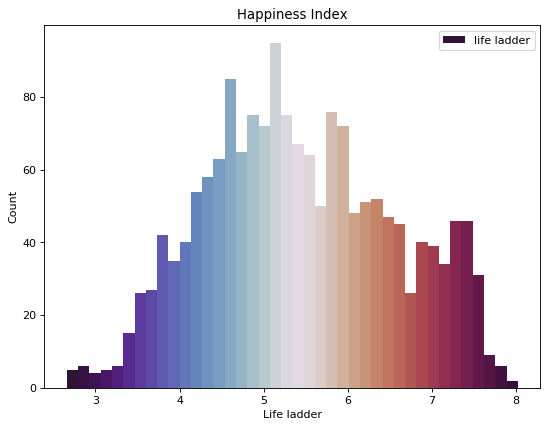

In [15]:
plt.figure(figsize=(8, 6), dpi=80)

cm = plt.cm.get_cmap('twilight_shifted')

n, bins, patches = plt.hist(world_happiness.life_ladder, bins = 40, color='green', label = "life ladder")

for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/40))
    
plt.xlabel("Life ladder")
plt.ylabel("Count")
plt.title("Happiness Index")
plt.legend()
plt.show()

This does not seem very Gaussian (suppose I can combine these two words).

It looks like it is positive skewed. The dreams about perfect Gaussian distribution are fading.

We still cannot make conclusions. We need to make some calculations. We have a __mean__ for the __life ladder__ = __5.432140__ and __std__ = __1.125504__. 

We are going to write function to calculate and show important metrics about the happiness index and its composing values. Even that we can see some of the values in the table below it would not be a good idea just to copy/paste it.


In [16]:
#Wanted to see the stats for the key variables but then decided I want to see it all
# df = world_happiness.iloc[:, 0:13]
# df = df.set_index("year")
world_happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1704.0,2012.332160,3.688072,2005.000,2009.00000,2012.0000,2015.00000,2018.000
life_ladder,1704.0,5.437157,1.121149,2.662,4.61125,5.3395,6.27350,8.019
log_GDP_per_capita,1676.0,9.222456,1.185781,6.457,8.30475,9.4065,10.19275,11.770
social_support,1691.0,0.810567,0.119212,0.290,0.74750,0.8330,0.90400,0.987
HLE_at_birth,1676.0,63.111970,7.583622,32.300,58.30000,65.0000,68.30000,76.800
freedom_to_make_life_choices,1675.0,0.733823,0.144107,0.258,0.63800,0.7530,0.84800,0.985
generosity,1622.0,0.000079,0.163367,-0.336,-0.11575,-0.0220,0.09375,0.678
perceptions_of_corruption,1608.0,0.751330,0.186070,0.035,0.69575,0.8060,0.87625,0.983
positive_affect,1685.0,0.709376,0.107976,0.362,0.62200,0.7190,0.80200,0.944
negative_affect,1691.0,0.265670,0.084700,0.083,0.20500,0.2550,0.31500,0.705


In [17]:

def important_metrics(data, title):
    std_happiness = np.std(data)
    mean_happiness = data.mean() #mean value 
    median_happiness = data.median() #middle of the ordered list
    mode_happiness = data.mode() #most often occuring
    diff_max_min = data.max() - data.min()
    
    sk_r_ew_happiness = skew(data)
    #If you are thinking sk_r_ew and screw are not linked by chance  - Yes, I like to play with the words :)
    
    kurtosis_happiness = kurtosis(world_happiness.life_ladder)
    #hashtag - platykurtic. #hashtag ILoveThisWord #hashtag ItIsStupidToWriteHashtags
    
    print(title)
    print("Standard deviation = {}".format(std_happiness))
    print("Mean = {}".format(mean_happiness))
    print("Median = {}".format(median_happiness))
    print("Mode = {}".format(mode_happiness))
    print("Difference between max and min values = {}".format(diff_max_min))
    print("Skewness = {}".format(sk_r_ew_happiness))
    print("Kurtosis = {}".format(kurtosis_happiness))
    

In [18]:
important_metrics(world_happiness.life_ladder, "Happiness index (life_ladder)")

Happiness index (life_ladder)
Standard deviation = 1.1208199513565953
Mean = 5.437156690140837
Median = 5.3395
Mode = 0    5.252
dtype: float64
Difference between max and min values = 5.357
Skewness = 0.11442161112098703
Kurtosis = -0.724115292080358


##### What do we have here? 
- The standard deviation is a little over 1.1
- Mean, Median, Mode and Difference between min and max value difference is not larger than 0.2 between any two
- The skewness value is near 0, not so far from the symetrical center
- The kurtosis is negative, meaning it is a bit flat, but still in the acceptable range of (-2:2)
- We need to take into consideration that our data for the countries is missing values for some years. 

Together all factors, stated above, are still not enough to reject H0 hypothesis. Let's perform a ttest to make a final statement about it. We will make three calculations - with the median, mode, and difference between min and max values. 
The critical value above which we will reject the null hypothesis is **0.01** (1%)

*Since we have the standard deviation, we can perform Z-test but we decided to stick with the t-test because it is good with small data sets*

In [19]:
print(st.ttest_1samp(world_happiness.life_ladder, 5.326).pvalue) #median
print(st.ttest_1samp(world_happiness.life_ladder, 5.252).pvalue) #mode 
print(st.ttest_1samp(world_happiness.life_ladder, 5.357).pvalue) #dif_max_min


4.463744029028542e-05
1.2838403345132013e-11
0.0032077986270270926


The p-values for the three tests are way below our significance level. 

Conclusion: Given the results from the last ttests we can **reject the H0 hypothesis**.

In [20]:
happiness_over_the_years = world_happiness.groupby("year")["life_ladder"].mean()
happiness_over_the_years

year
2005    6.446259
2006    5.196899
2007    5.418275
2008    5.418509
2009    5.457667
2010    5.496806
2011    5.424082
2012    5.443754
2013    5.394562
2014    5.389021
2015    5.404035
2016    5.399479
2017    5.460408
2018    5.502125
Name: life_ladder, dtype: float64

We will check the  H0 - H1 hypothesis for the key values of the happiness index:
- log_GDP_per_capita                   
- social_support                       
- HLE_at_birth                         
- freedom_to_make_life_choices         
- generosity                          
- perceptions_of_corruption,

and also
- positive_affect                      
- negative_affect                      

Also we will see the correlations (if there are any) between these variable and the happiness index. But before that we have process the data more. 

In [21]:
# important_metrics(world_happiness., "")
# print()
# print(st.ttest_1samp(world_happiness., ).pvalue) #median
# print(st.ttest_1samp(world_happiness., ).pvalue) #mode 
# print(st.ttest_1samp(world_happiness., ).pvalue) #dif_max_min

In [22]:
def plot_scatter(data_x, data_y, title, xl, yl):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    color = np.random.rand(data_x.count())
    area = (4 * happiness_over_the_years) **1.5
    plt.scatter(range(len(data_x.index)), data_y, 
               c = color,
               alpha = 0.5,
               s = area,
               label = "{}".format(yl) )
    plt.xlabel("{}".format(xl), )
    plt.ylabel("{}".format(yl))
    plt.title("{}".format(title))
    plt.legend()
    plt.xticks(range(len(data_x.index)),data_x.index, rotation='vertical')
    plt.show()

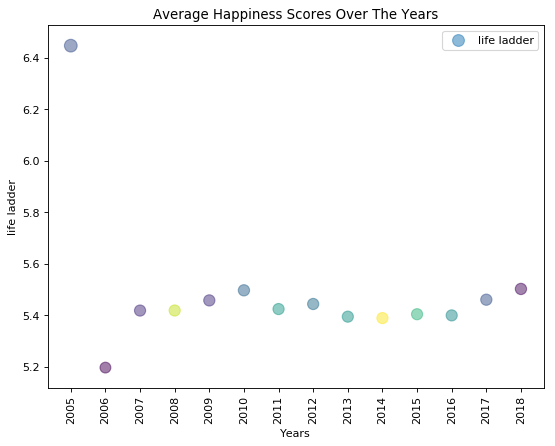

In [23]:
title = "Average Happiness Scores Over The Years"
xl = "Years"
yl = "life ladder"
plot_scatter(happiness_over_the_years, happiness_over_the_years, title, xl, yl)

Looks like we have an outlier. We can plot the happiness distribution over the years with a barchart. Seems that 2005 is "shining diamond" in a stone river.

In [24]:
def plot_barh(data, title, xl, yl, cmap):
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

    cm = plt.cm.get_cmap("{}".format(cmap))
    patches = plt.barh(range(len(data.index)), 
                       data, align='center', alpha=0.7)

    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i**2))


    plt.yticks(range(len(data.index)),
               data.index)
    plt.xlabel("{}".format(xl))
    plt.ylabel("{}".format(yl))
    plt.title("{}".format(title))
    plt.show()


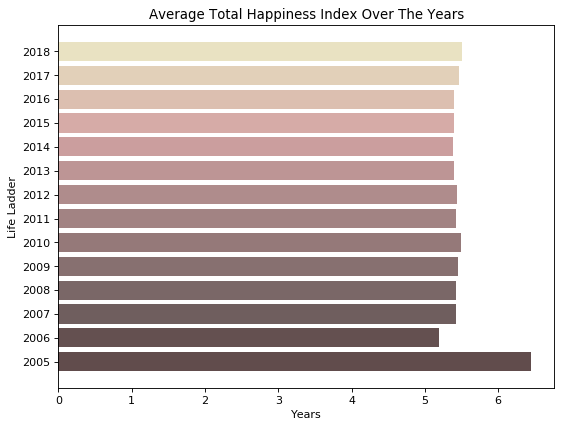

In [25]:
plot_barh(happiness_over_the_years, "Average Total Happiness Index Over The Years", "Years", "Life Ladder", "pink")

# figure(num=None, figsize=(8, 6), dpi=80)
# plt.bar(range(len(happiness_over_the_years.index)), happiness_over_the_years, 
#            alpha = 0.5,
#            label = "life ladder" ) 

# plt.xlabel("Years")
# plt.ylabel("Life Ladder")
# plt.title("Average Total Happiness Index Over The Years")
# plt.legend()
# plt.xticks(range(len(happiness_over_the_years.index)),happiness_over_the_years.index)
# plt.show()

In [26]:
#Sort to see the happiest and unhappiest year
happiness_over_the_years_sorted = happiness_over_the_years.sort_values(ascending = True)
happiness_over_the_years_sorted

year
2006    5.196899
2014    5.389021
2013    5.394562
2016    5.399479
2015    5.404035
2007    5.418275
2008    5.418509
2011    5.424082
2012    5.443754
2009    5.457667
2017    5.460408
2010    5.496806
2018    5.502125
2005    6.446259
Name: life_ladder, dtype: float64

We can notice that in 2005 people were significantly happier compared to the rest of the years. 

### Why is 2005 the happiest year?

Were we really that happy in 2005? Well, as we can see from the data, life ladder is reported for only 27 countries, compared to 89 in 2006 and over 100 during the following years. We can see who these countries are?

In [28]:
happiest_year = 2005
group_years = world_happiness.groupby("year")
happiest_year_countries = group_years.get_group(happiest_year)
happiest_year_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 59 to 1642
Data columns (total 16 columns):
country_name                         27 non-null object
year                                 27 non-null int64
life_ladder                          27 non-null float64
log_GDP_per_capita                   27 non-null float64
social_support                       27 non-null float64
HLE_at_birth                         27 non-null float64
freedom_to_make_life_choices         25 non-null float64
generosity                           1 non-null float64
perceptions_of_corruption            25 non-null float64
positive_affect                      26 non-null float64
negative_affect                      26 non-null float64
confidence_in_national_government    24 non-null float64
democratic_quality                   27 non-null float64
delivery_quality                     27 non-null float64
SD_of_ladder_by_country_year         27 non-null float64
SD_mean_of_ladder_by_country_year    27 non

In [29]:
#The happy group
happy_2005 = happiest_year_countries.groupby("country_name")["life_ladder"].mean().sort_values(ascending = True)
happy_2005

country_name
Turkey            4.719
Romania           5.049
Egypt             5.168
Hungary           5.194
Pakistan          5.225
Iran              5.308
Lebanon           5.491
Poland            5.587
Greece            6.006
Jordan            6.295
Czech Republic    6.439
Japan             6.516
Mexico            6.581
Germany           6.620
Brazil            6.637
Italy             6.854
United Kingdom    6.984
Saudi Arabia      7.080
France            7.093
Spain             7.153
Venezuela         7.170
Belgium           7.262
Australia         7.341
Sweden            7.376
Canada            7.418
Netherlands       7.464
Denmark           8.019
Name: life_ladder, dtype: float64

Let's see who are the 27 happiest countries on average for the whole period. Then we can make a comparison.

In [30]:
group_happy_index = world_happiness.groupby("country_name")["life_ladder"].mean().sort_values(ascending = False)
group_happy_index = group_happy_index.head(27)
group_happy_index = group_happy_index.groupby("country_name").mean().sort_values(ascending = True)

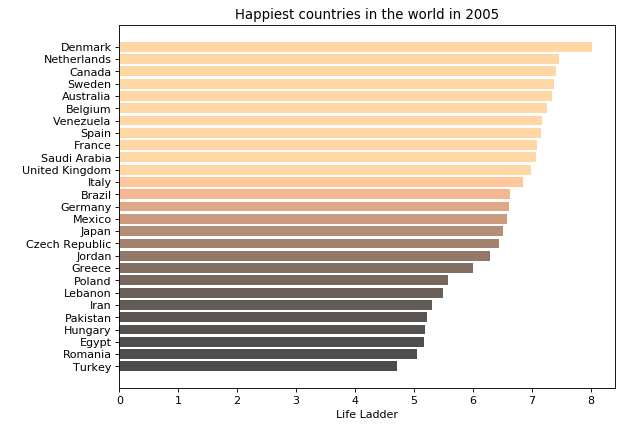

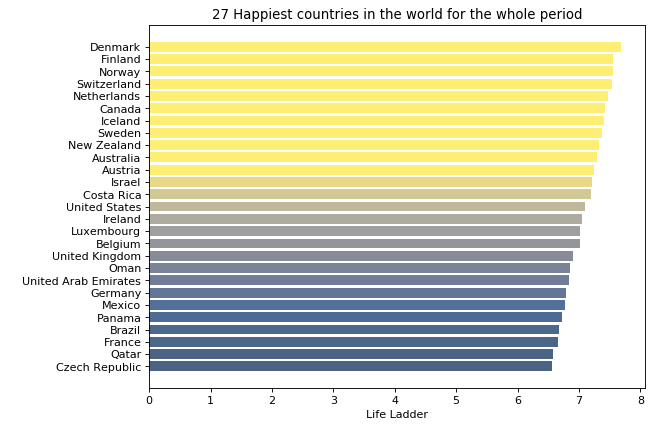

In [31]:
#plot happiest in 2005
plot_barh(happy_2005,"Happiest countries in the world in 2005", "Life Ladder", " ", "copper")

#happiest 27 for the period as a whole
plot_barh(group_happy_index, "27 Happiest countries in the world for the whole period", "Life Ladder", " ", "cividis")

In [32]:
#Looking for a way to compare the two data sets and extract the duplicate countries
#First - create a dictionary with countries as values
'''
Converting a list to dictionary with list elements as values in dictionary
and keys are enumerated index starting from 0 i.e. index position of element in list
''' 
dict_happy = { i : happy_2005.index[i] for i in range(0, len(happy_2005.index) ) }
dict_happy.values()


dict_values(['Turkey', 'Romania', 'Egypt', 'Hungary', 'Pakistan', 'Iran', 'Lebanon', 'Poland', 'Greece', 'Jordan', 'Czech Republic', 'Japan', 'Mexico', 'Germany', 'Brazil', 'Italy', 'United Kingdom', 'Saudi Arabia', 'France', 'Spain', 'Venezuela', 'Belgium', 'Australia', 'Sweden', 'Canada', 'Netherlands', 'Denmark'])

In [33]:
dict_most_happy = { i : group_happy_index.index[i] for i in range(0, len(group_happy_index.index) ) }
dict_most_happy.values()

dict_values(['Czech Republic', 'Qatar', 'France', 'Brazil', 'Panama', 'Mexico', 'Germany', 'United Arab Emirates', 'Oman', 'United Kingdom', 'Belgium', 'Luxembourg', 'Ireland', 'United States', 'Costa Rica', 'Israel', 'Austria', 'Australia', 'New Zealand', 'Sweden', 'Iceland', 'Canada', 'Netherlands', 'Switzerland', 'Norway', 'Finland', 'Denmark'])

In [34]:
#Second - make the comparison
common_countries = [] 
for k in dict_happy.values():
    if k in dict_most_happy.values():
        common_countries.append(k)

print("Count of happiest countries: {}".format(len(common_countries)))
common_countries

Count of happiest countries: 12


['Czech Republic',
 'Mexico',
 'Germany',
 'Brazil',
 'United Kingdom',
 'France',
 'Belgium',
 'Australia',
 'Sweden',
 'Canada',
 'Netherlands',
 'Denmark']

Nearly half of the countries which were included in the 2005 rating are still top rated. Denmark and Netherlands ocupy positions in top 5. Well, these very happy countries (ok, the people in the countries, countries cannot be happy, I know that) are doing ok. But, we are thinking now, will they do ok on average if we skip 2005? Also, what will be the distribution of the life_ladder in this case? 

In [35]:
#we are going to delete the rows with year 2005
to_del_year = world_happiness[world_happiness.year.isin([2005])].index.tolist()

#drop it and save in another dataframe
world_happiness_no_2005 = world_happiness.drop(to_del_year)

#done
world_happiness_no_2005.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2007, 2006], dtype=int64)

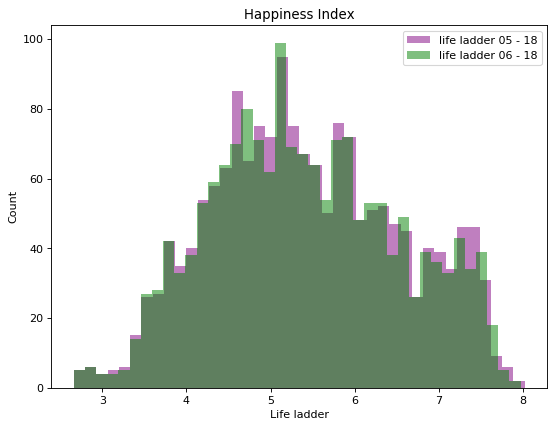

In [36]:
#check again the distribution
plt.figure(figsize=(8, 6), dpi=80)

plt.hist(world_happiness.life_ladder, bins = 40, color='purple', label = "life ladder 05 - 18", alpha = 0.5)
plt.hist(world_happiness_no_2005.life_ladder, bins = 40, color='green', label = "life ladder 06 - 18", alpha = 0.5)

  
plt.xlabel("Life ladder")
plt.ylabel("Count")
plt.title("Happiness Index")
plt.legend()
plt.show()

It appears to be overlapping, with green moving a little to the left. Time to explore the metrics: 

In [37]:
important_metrics(world_happiness_no_2005.life_ladder, "Happiness index data ex. 2005")

#For comparison
# Happiness index (life_ladder)
# Standard deviation = 1.1208199513565953
# Mean = 5.437156690140837
# Median = 5.3395
# Mode = 0    5.252
# dtype: float64
# Difference between max and min values = 5.357
# Skewness = 0.11442161112098703
# Kurtosis = -0.724115292080358

Happiness index data ex. 2005
Standard deviation = 1.116560245572919
Mean = 5.420909958258789
Median = 5.326
Mode = 0    5.252
dtype: float64
Difference between max and min values = 5.309
Skewness = 0.12405763736970989
Kurtosis = -0.724115292080358


In [38]:
print(st.ttest_1samp(world_happiness_no_2005.life_ladder, 5.326).pvalue) #median
print(st.ttest_1samp(world_happiness_no_2005.life_ladder, 5.252).pvalue) #mode 
print(st.ttest_1samp(world_happiness_no_2005.life_ladder, 5.309).pvalue) #dif_max_min

# For comparison
# 4.463744029028542e-05
# 1.2838403345132013e-11
# 0.0032077986270270926

0.0005144458125723629
7.403653906822444e-10
4.270245066566228e-05


The results are clear again - We reject the H0 hypothesis... again

Actually we can continue working with our main data set which includes 2005 results. But before that we need to fill the NaN values for our variables (and the percentage of Nan values). We will use linear interpolation for this process.


In [39]:
# log_GDP_per_capita
# social_support
# HLE_at_birth
# freedom_to_make_life_choices
# generosity
# perceptions_of_corruption

#function to plot the annualized data for the variables
def plot_func(data, to_group, variable, color, style):
    plt.figure(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    data.groupby(to_group)[variable].mean().plot(color = color, style = style, markersize = 12)
    data.groupby(to_group)[variable].mean().plot(color = "grey", style = '--')
    plt.xlabel("{}".format(to_group))
    plt.ylabel("{}".format(variable))
    plt.title("Average annual {}".format(variable))
    plt.show()


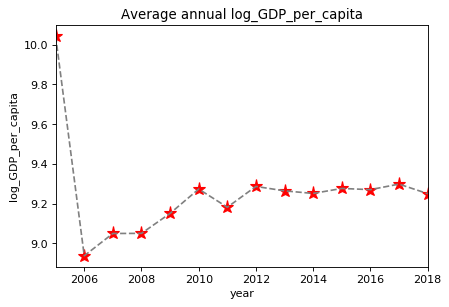

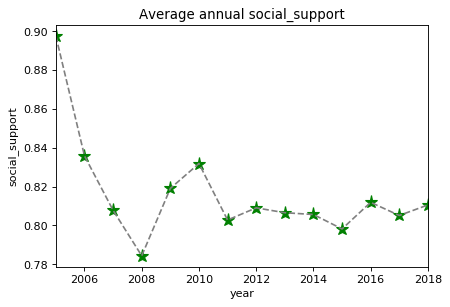

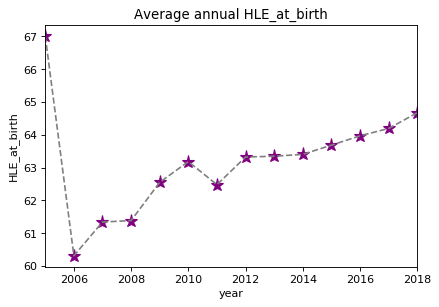

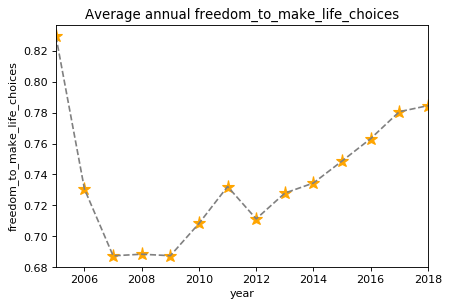

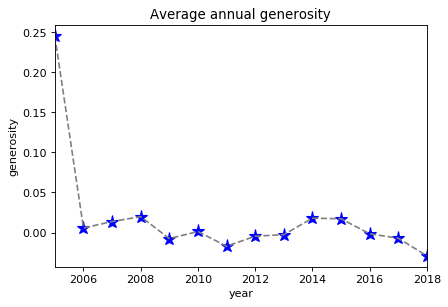

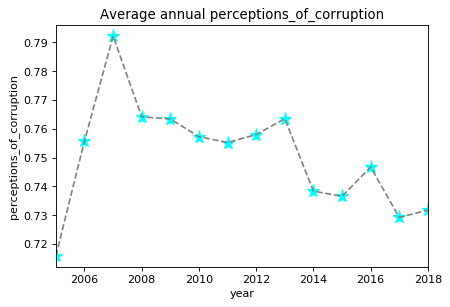

In [40]:
#before filling the na values
plot_func(world_happiness, "year", "log_GDP_per_capita", "red", "*")
plot_func(world_happiness, "year", "social_support", "green", "*")
plot_func(world_happiness, "year", "HLE_at_birth", "purple", "*")
plot_func(world_happiness, "year", "freedom_to_make_life_choices", "orange", "*")
plot_func(world_happiness, "year", "generosity", "blue", "*")
plot_func(world_happiness, "year", "perceptions_of_corruption", "cyan", "*")


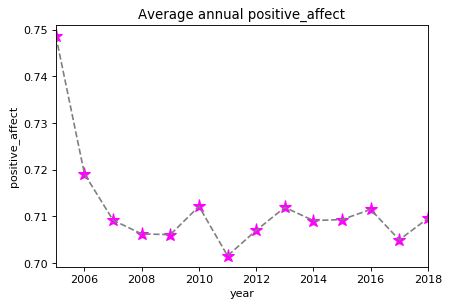

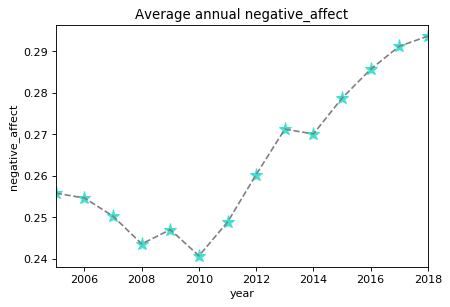

In [41]:
# positive_affect
# negative_affect
plot_func(world_happiness, "year", "positive_affect", "magenta", "*")
plot_func(world_happiness, "year", "negative_affect", "turquoise", "*")

In [42]:
#Interpolation, I guess a function will make it look better. 

# % NaN values - log_GDP_per_capita -> 1.643192
world_happiness.log_GDP_per_capita = world_happiness.log_GDP_per_capita.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - social_support  -> 0.762911
world_happiness.social_support = world_happiness.social_support.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - HLE_at_birth  -> 1.643192
world_happiness.HLE_at_birth = world_happiness.HLE_at_birth.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - freedom_to_make_life_choices  -> 1.701878
world_happiness.freedom_to_make_life_choices = world_happiness.freedom_to_make_life_choices.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - generosity  -> 4.812207
world_happiness.generosity = world_happiness.generosity.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - perceptions_of_corruption -> 5.633803
world_happiness.perceptions_of_corruption = world_happiness.perceptions_of_corruption.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - positive_affect -> 1.115023
world_happiness.positive_affect = world_happiness.positive_affect.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - negative_affect -> 0.762911
world_happiness.negative_affect = world_happiness.negative_affect.interpolate(method ='linear', limit_direction ='both') 


Below - Variables that we will not use further since we are not sure linear interpolation is good method for them, due to bigger amount of missing vallues.

In [43]:
# % NaN values - confidence_in_national_government -> 10.211268
world_happiness.confidence_in_national_government = world_happiness.confidence_in_national_government.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - democratic_quality -> 8.568075
world_happiness.democratic_quality = world_happiness.democratic_quality.interpolate(method ='linear', limit_direction ='both') 

# % NaN values - delivery_quality -> 8.509390
world_happiness.delivery_quality = world_happiness.delivery_quality.interpolate(method ='linear', limit_direction ='both') 

In [44]:
#check if Nan are filled

world_happiness.isna().values.sum()

0

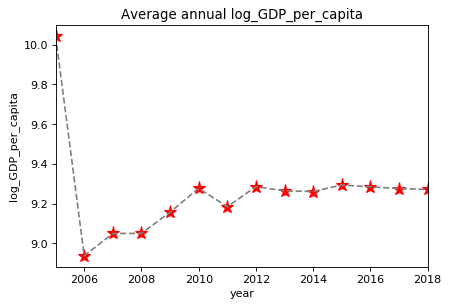

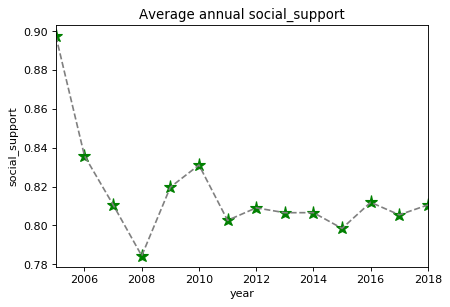

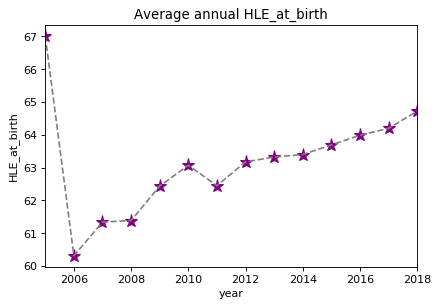

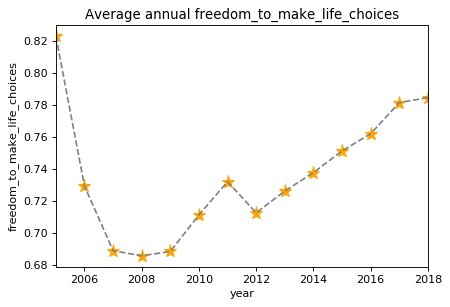

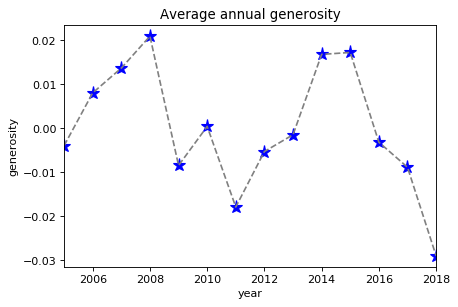

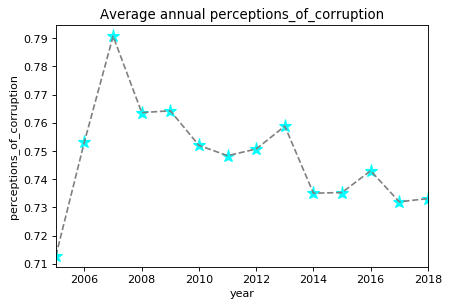

In [45]:
#Interpolated results. Good idea to plot it together with the  original data

plot_func(world_happiness, "year", "log_GDP_per_capita", "red", "*")
plot_func(world_happiness, "year", "social_support", "green", "*")
plot_func(world_happiness, "year", "HLE_at_birth", "purple", "*")
plot_func(world_happiness, "year", "freedom_to_make_life_choices", "orange", "*")
plot_func(world_happiness, "year", "generosity", "blue", "*")
plot_func(world_happiness, "year", "perceptions_of_corruption", "cyan", "*")

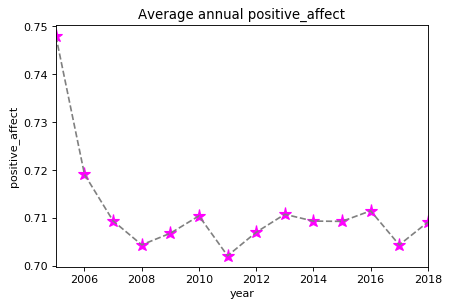

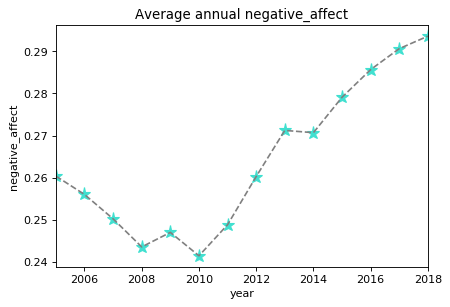

In [46]:
# positive_affect
# negative_affect
plot_func(world_happiness, "year", "positive_affect", "magenta", "*")
plot_func(world_happiness, "year", "negative_affect", "turquoise", "*")

The biggest change we notice is in the *generosity* variable. This could be due to the big number of missing values in the column and inapropriately chosen interpolation method (*Next time compare different interpolation methods in order to pic the best for every variable*)

**After examining the plots it will be interesting to see if there is significant difference between any two key variables.** 
In our case we will compare first *perception of corruption and freedom to make life choices*. From the plots looks like they are moving in an opposite directions(possible explanation - choices are limited by rules. rules limit corruption).
The second comparison will be between gdp per capita and positive affects. 

For both hypothesis that we will state we will use the [Paired Two-Sample t-test](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/). This test is applied to compare whether two population means are equal. Also, the groups are part of the same data set and are linked to the same index.

#### First Test: Does the Freedom to make life choices is more significant than the perceptions of corruption?
- H0: Nothing interesting. It is not
- H1: It is more significant

In [47]:
st.ttest_rel(world_happiness.freedom_to_make_life_choices, world_happiness.perceptions_of_corruption).pvalue / 2

0.01821416047375123

With a significance level, equal to 0.01 and p value = 0.026, we cannot reject the null hypothesis.
With a significance level, equal to 0.05 and p value = 0.026, we reject the null hupothesis.
In the first case we cannot reject the possibility that freedom to make life choices is not linked to perception of corruption. On the other hand, in the second  case we reject the null hypothesis. This does not mean that we automatically will accept the H1 hypothesis.

#### First Test: Does GDP affects the positive affect?
- H0: Nothing interesting. It does not
- H1: It is more significant

In [48]:
st.ttest_rel(world_happiness.log_GDP_per_capita, world_happiness.positive_affect).pvalue / 2

0.0

This one is interesting. Obviously, we can reject the H0 hypothesis both at significance levels 0.01 and 0.05. There is a correlation between both.
Lets see it:

In [49]:
world_happiness.log_GDP_per_capita.corr(world_happiness.positive_affect)

0.3047814799158787

There is positive correlation between both variables, meaning they move in the same direction. In other words, increasing gdp has positive effect on happiness, laugh and enjoyment (*positive effect* is the average of these three measures). But we have to keep in mind that the correlation is low, so higher increse in the gdp will lead to not so big increase in the possitive affect and vise versa.

In [50]:
#get the variables that we have already plotted
df_cut = world_happiness.iloc[:, 0:10]

In [51]:
#Not working properly
# f = plt.figure(figsize=(14, 10))
# plt.matshow(df_cut.corr(), fignum=f.number)
# plt.xticks(range(df_cut.shape[1]), df_cut.columns, fontsize=14, rotation=90)
# plt.yticks(range(df_cut.shape[1]), df_cut.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

### Explore population density data set

In [52]:
population_density = pd.read_csv("population_density.csv")
population_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 17 columns):
Country Name     219 non-null object
Country Code     217 non-null object
Series Name      217 non-null object
Series Code      217 non-null object
2005 [YR2005]    217 non-null object
2006 [YR2006]    217 non-null object
2007 [YR2007]    217 non-null object
2008 [YR2008]    217 non-null object
2009 [YR2009]    217 non-null object
2010 [YR2010]    217 non-null object
2011 [YR2011]    217 non-null object
2012 [YR2012]    217 non-null object
2013 [YR2013]    217 non-null object
2014 [YR2014]    217 non-null object
2015 [YR2015]    217 non-null object
2016 [YR2016]    217 non-null object
2017 [YR2017]    217 non-null object
dtypes: object(17)
memory usage: 29.6+ KB


In [53]:
population_density.head(2)

,Country Name,Country Code,Series Name,Series Code,2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,39.2952194957571,40.488081671415,41.5104861685507,42.4628189810986,43.4929586741415,44.7040820390283,46.1315029255889,47.7305639800263,49.4280381705113,51.1147780534877,52.7120715007812,54.1971142358239,55.5959930153479
1,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,109.908284671533,109.21704379562,108.394781021898,107.566204379562,106.843759124088,106.314635036496,106.02901459854,105.854051094891,105.660291970803,105.441751824818,105.135145985401,104.967189781022,104.870693430657


We will have some cleaning to do here:
- First, we will start with making the year columns looking better
- Then, removing unnecessary column
- Followed by dropping unnecessary rows
- Melting columns
- and more. 

Let's do this first.

In [54]:
#remove unnecessary labeling, cleaning the columns 
population_density = population_density.rename(columns=lambda x: re.sub(r'\[(.*?)\]','',x))

In [55]:
#Column "Series Code contains the same data, which is not interesting for us"
population_density.drop(["Series Code"], axis = 1, inplace = True)

In [56]:
population_density.sample()
#looks better now

,Country Name,Country Code,Series Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
102,Kiribati,KIR,Population density (people per sq. km of land ...,113.981481481481,116.472839506173,119.169135802469,121.927160493827,124.604938271605,127.07037037037,129.293827160494,131.320987654321,133.197530864198,135.050617283951,136.950617283951,138.918518518519,140.935802469136


In [57]:
#Time to deal with some rows that we don't need
population_density["Country Name"].tail(10)

212                               Virgin Islands (U.S.)
213                                  West Bank and Gaza
214                                         Yemen, Rep.
215                                              Zambia
216                                            Zimbabwe
217                                                 NaN
218                                                 NaN
219                                                 NaN
220    Data from database: World Development Indicators
221                            Last Updated: 07/10/2019
Name: Country Name, dtype: object

In [58]:
#remove the last five rows - they don't bring information, will write reference in the end :)
population_density.drop(population_density.index[217:222], inplace = True)

In [59]:
#double check
population_density["Country Name"].tail(5)

212    Virgin Islands (U.S.)
213       West Bank and Gaza
214              Yemen, Rep.
215                   Zambia
216                 Zimbabwe
Name: Country Name, dtype: object

In [60]:
#Years should be in one column. 
population_density = pd.melt(population_density, id_vars = ["Country Name", "Country Code", "Series Name"], var_name="Year", value_name="Value" )
population_density.sample()

,Country Name,Country Code,Series Name,Year,Value
2639,Canada,CAN,Population density (people per sq. km of land ...,2017,4.01827985013488


In [61]:
population_density.shape

(2821, 5)

In [62]:
population_density["Series Name"].unique()

array(['Population density (people per sq. km of land area)'],
      dtype=object)

In [63]:
#Python friendly labeling
population_density.rename(columns = {
    "Value": "population_density_(people per sq. km)",
    "Country Name": "country_name",
    "Country Code": "country_code",
    "Year": "year"
},
                          inplace=True)

In [64]:
population_density.sample()

,country_name,country_code,Series Name,year,population_density_(people per sq. km)
874,Antigua and Barbuda,ATG,Population density (people per sq. km of land ...,2009,197.15


In [65]:
#It is good to sort things out 
population_density.sort_values(by = ["country_name", "year"], inplace = True)
population_density.head()

,country_name,country_code,Series Name,year,population_density_(people per sq. km)
0,Afghanistan,AFG,Population density (people per sq. km of land ...,2005,39.2952194957571
217,Afghanistan,AFG,Population density (people per sq. km of land ...,2006,40.488081671415
434,Afghanistan,AFG,Population density (people per sq. km of land ...,2007,41.5104861685507
651,Afghanistan,AFG,Population density (people per sq. km of land ...,2008,42.4628189810986
868,Afghanistan,AFG,Population density (people per sq. km of land ...,2009,43.4929586741415


- Our next steps will be to fixt the types of the columns, if needed. 
- Values need some makeover too

In [66]:
population_density.dtypes

country_name                              object
country_code                              object
Series Name                               object
year                                      object
population_density_(people per sq. km)    object
dtype: object

In [67]:
population_density["population_density_(people per sq. km)"].unique()

array(['39.2952194957571', '40.488081671415', '41.5104861685507', ...,
       '35.7105570634613', '36.2682952048598', '36.8017190125372'],
      dtype=object)

In [68]:
#I know because i've seen it
population_density["population_density_(people per sq. km)"].replace("..", np.nan, inplace = True)

In [69]:
#make float
population_density["population_density_(people per sq. km)"] = population_density["population_density_(people per sq. km)"].astype(float)

In [70]:
#round up to two decimal
population_density["population_density_(people per sq. km)"] = population_density["population_density_(people per sq. km)"].round(2)

In [71]:
#let's have some categories
population_density.year = population_density.year.astype("category")
population_density.country_name = population_density.country_name.astype("category")

In [72]:
population_density.sample()

,country_name,country_code,Series Name,year,population_density_(people per sq. km)
1903,Senegal,SEN,Population density (people per sq. km of land ...,2013,71.59


In [73]:
population_density.dtypes
#looks good now

country_name                              category
country_code                                object
Series Name                                 object
year                                      category
population_density_(people per sq. km)     float64
dtype: object

In [74]:
population_density.country_name.nunique()

217

In [75]:
world_happiness.country_name.nunique()

165

In order to make comparisons between the world happiness index and the population density we need to have the same number of countries and the same countries. Since it is there is a slight difference, we will need to drop some countries and regions from the population density data set, so we can compare the same. Also we will rename some of the countries in the world happiness index to make everything beautiful.

The following cleaning of data was possible after 15 minutes of work off the notebook and with excel :)

In [76]:
#remove the countries that are not present in the world_happiness index
to_del_pop = population_density[population_density["country_name"].isin(["American Samoa",
"Andorra", "Antigua and Barbuda", "Aruba", "Bahamas, The", "Barbados", "Bermuda", "British Virgin Islands",
"Brunei Darussalam", "Cabo Verde", "Cayman Islands", "Channel Islands", "Curacao", "Dominica", "Equatorial Guinea",
"Eritrea", "Faroe Islands", "Fiji", "French Polynesia", "Gibraltar", "Greenland", "Grenada", "Guam", "Guinea-Bissau",
"Isle of Man", "Kiribati", "Korea, Dem. People’s Rep.", "Liechtenstein", "Macao SAR, China", "Maldives", "Marshall Islands",
"Micronesia, Fed. Sts.", "Monaco", "Nauru", "New Caledonia", "Northern Mariana Islands", "Palau", "Papua New Guinea",
"Puerto Rico", "Samoa", "San Marino", "Sao Tome and Principe", "Seychelles", "Sint Maarten (Dutch part)", "Solomon Islands",
"St. Kitts and Nevis", "St. Lucia", "St. Martin (French part)", "St. Vincent and the Grenadines", "Timor-Leste",
"Tonga", "Turks and Caicos Islands", "Tuvalu", "Vanuatu", "Virgin Islands (U.S.)"])].index.tolist()
population_density = population_density.drop(to_del_pop)

In [77]:
population_density["country_name"].nunique()

162

In [78]:
#Rename countries to match the same names in all data sets
world_happiness["country_name"] = world_happiness["country_name"].replace({
    "Ivory Coast": "Cote d'Ivoire",
    "Swaziland": "Eswatini",
    "Hong Kong S.A.R. of China": "Hong Kong SAR, China",
    "South Korea": "Korea, Rep.",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Laos": "Lao PDR",
    "Macedonia": "North Macedonia",
    "Russia": "Russian Federation",
    "Slovakia": "Slovak Republic",
    "Syria": "Syrian Arab Republic",
    "Palestinian Territories": "West Bank and Gaza",
    "Congo (Brazzaville)": "Congo, Rep.",
    'Congo (Kinshasa)': "Congo, Dem. Rep.",
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The', 
    'Iran': 'Iran, Islamic Rep.',
    'Venezuela': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.',
})

In [79]:
world_happiness.sort_values(by = ["country_name", "year"], inplace = True)

In [80]:
to_del = world_happiness[world_happiness["country_name"].isin(["North Cyprus", "Somaliland region", "Taiwan Province of China"])].index.tolist()
world_happiness = world_happiness.drop(to_del)
world_happiness["country_name"].nunique()

162

Now we will check for NaN values and make further processing of the population density data.

In [81]:
population_density.year.unique()

[2005, 2006, 2007, 2008, 2009, ..., 2013, 2014, 2015, 2016, 2017]
Length: 13
Categories (13, object): [2005, 2006, 2007, 2008, ..., 2014, 2015, 2016, 2017]

The dataset includes only the period from 2005 to 2018. We will drop 2018 from the world_happiness data set.

In [82]:
to_del_2018 = world_happiness[world_happiness.year.isin([2018])].index.tolist()

#drop it 
world_happiness = world_happiness.drop(to_del_2018)

#done
world_happiness.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007,
       2006, 2005], dtype=int64)

In [83]:
population_density.isna().values.sum()

26

In [84]:
population_density[population_density.isna().any(axis = 1)]

,country_name,country_code,Series Name,year,population_density_(people per sq. km)
178,South Sudan,SSD,Population density (people per sq. km of land ...,2005,NaN
395,South Sudan,SSD,Population density (people per sq. km of land ...,2006,NaN
612,South Sudan,SSD,Population density (people per sq. km of land ...,2007,NaN
829,South Sudan,SSD,Population density (people per sq. km of land ...,2008,NaN
1046,South Sudan,SSD,Population density (people per sq. km of land ...,2009,NaN
1263,South Sudan,SSD,Population density (people per sq. km of land ...,2010,NaN
1480,South Sudan,SSD,Population density (people per sq. km of land ...,2011,NaN
1697,South Sudan,SSD,Population density (people per sq. km of land ...,2012,NaN
1914,South Sudan,SSD,Population density (people per sq. km of land ...,2013,NaN
2131,South Sudan,SSD,Population density (people per sq. km of land ...,2014,NaN


There is no information about these two countries for the whole period. 
- South Sudan declared [independance from Republic of the Sudan in 2011](https://en.wikipedia.org/wiki/South_Sudan). This make it impossible to get real past data for the whole period we examining. We will drop this country from our data sets.
- For Sudan we will add information from [indexmundi](https://www.indexmundi.com/facts/sudan/population-density) - for the period from 2005 to 2016 and add data for 2017 we will estimate based on the average change in population density over the years.

In [85]:
#remove South Sudan
to_del_country_no_info = population_density[population_density["country_name"].isin(["South Sudan"])].index.tolist()
population_density.drop(to_del_country_no_info, inplace = True)
to_del_country_no_info = world_happiness[world_happiness["country_name"].isin(["South Sudan"])].index.tolist()
world_happiness.drop(to_del_country_no_info, inplace = True)

In [86]:
#add values in Sudan
# initialize list of lists 
data_population = [
    [2005, 16.87],
    [2006, 17.36],
    [2007, 17.87],
    [2008, 18.38],
    [2009, 18.91],
    [2010, 19.43],
    [2011, 19.96],
    [2012, 20.49],
    [2013, 21.03],
    [2014, 21.57],
    [2015, 22.13],
    [2016, 22.69],
    [2017, ]] 
  
# Create the pandas DataFrame 
df_sudan = pd.DataFrame(data_population, columns = ['year', 'population_density_per_sq_km'], )
df_sudan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
year                            13 non-null int64
population_density_per_sq_km    12 non-null float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


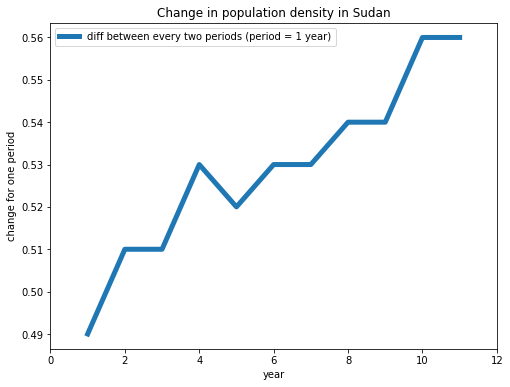

In [87]:
df_sudan["population_density_per_sq_km"].diff().plot(figsize=(8,6), linewidth=5, fontsize=10, label = "diff between every two periods (period = 1 year)")
plt.title("Change in population density in Sudan")
plt.xlabel('year', fontsize=10)
plt.ylabel('change for one period', fontsize = 10)
plt.legend(loc=2)
plt.show()

In [88]:
mean_diff = df_sudan["population_density_per_sq_km"].diff().mean()
mean_diff

0.5290909090909092

In [89]:
#let's get the data
df_sudan.loc[df_sudan["year"] == 2017, "population_density_per_sq_km"] = 22.69 + mean_diff
df_sudan = df_sudan.round(2)
df_sudan

,year,population_density_per_sq_km
0,2005,16.87
1,2006,17.36
2,2007,17.87
3,2008,18.38
4,2009,18.91
5,2010,19.43
6,2011,19.96
7,2012,20.49
8,2013,21.03
9,2014,21.57


In [90]:
#Add to the main data set/ fill na
for row, j in zip(population_density.loc[population_density["population_density_(people per sq. km)"].isnull(), 'population_density_(people per sq. km)'].index, df_sudan.population_density_per_sq_km):
    population_density.at[row, 'population_density_(people per sq. km)'] = j

In [91]:
population_density[population_density["country_name"] == "Sudan"]

,country_name,country_code,Series Name,year,population_density_(people per sq. km)
185,Sudan,SDN,Population density (people per sq. km of land ...,2005,16.87
402,Sudan,SDN,Population density (people per sq. km of land ...,2006,17.36
619,Sudan,SDN,Population density (people per sq. km of land ...,2007,17.87
836,Sudan,SDN,Population density (people per sq. km of land ...,2008,18.38
1053,Sudan,SDN,Population density (people per sq. km of land ...,2009,18.91
1270,Sudan,SDN,Population density (people per sq. km of land ...,2010,19.43
1487,Sudan,SDN,Population density (people per sq. km of land ...,2011,19.96
1704,Sudan,SDN,Population density (people per sq. km of land ...,2012,20.49
1921,Sudan,SDN,Population density (people per sq. km of land ...,2013,21.03
2138,Sudan,SDN,Population density (people per sq. km of land ...,2014,21.57


In [92]:
#finally got rid of the NaNs
population_density.isna().sum()

country_name                              0
country_code                              0
Series Name                               0
year                                      0
population_density_(people per sq. km)    0
dtype: int64

In [93]:
population_density.country_name.nunique(), population_density.shape

(161, (2093, 5))

In [94]:
world_happiness.country_name.nunique(), world_happiness.shape

(161, (1545, 16))

    Seems we have different size, we will have to deal with this later. 

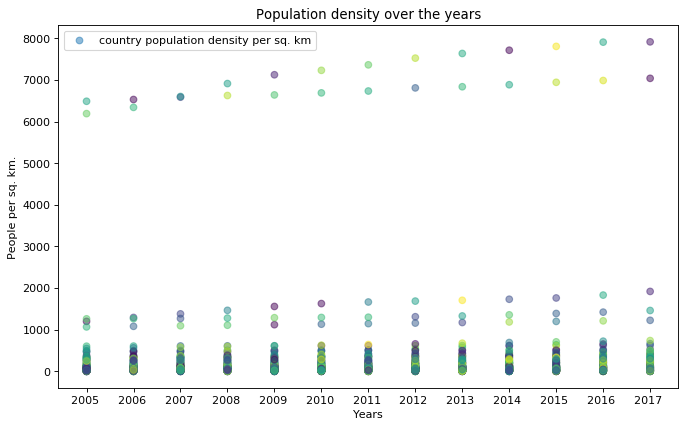

(2093,)

In [95]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

#Return array with rows, equal to the population_density
color = np.random.rand(2093)
#area = (30 * np.random.rand(2821))**2
plt.scatter(population_density["year"], population_density["population_density_(people per sq. km)"], 
           c = color,
           alpha = 0.5,
           label = "country population density per sq. km")

plt.xlabel("Years")
plt.ylabel("People per sq. km.")
plt.title("Population density over the years")
plt.legend(loc = 2)
plt.show()


#either put it in new row or remove it later
#embed plot
color.shape

In [96]:
#prove the scatter should look like this
population_density["population_density_(people per sq. km)"].max(), population_density["population_density_(people per sq. km)"].min()

(7915.73, 1.63)

    Some people live really close. There is clear enormous distinction between the most populated areas and the ones with    less than two people per sq. km. (yes, person and a half is fine here :)). 

In [97]:
population_density.loc[population_density["population_density_(people per sq. km)"].idxmax()]

country_name                                                                      Singapore
country_code                                                                            SGP
Series Name                               Population density (people per sq. km of land ...
year                                                                                  2017 
population_density_(people per sq. km)                                              7915.73
Name: 2775, dtype: object

In [98]:
population_density.loc[population_density["population_density_(people per sq. km)"].idxmin()]

country_name                                                                       Mongolia
country_code                                                                            MNG
Series Name                               Population density (people per sq. km of land ...
year                                                                                  2005 
population_density_(people per sq. km)                                                 1.63
Name: 131, dtype: object

In [99]:
most_densed = population_density.groupby("country_name")["population_density_(people per sq. km)"].mean().sort_values(ascending = False)
most_densed = most_densed.head(15)
most_densed = most_densed.groupby("country_name").mean().sort_values(ascending = False)
most_densed

country_name
Singapore               7252.032308
Hong Kong SAR, China    6753.926923
Bahrain                 1603.390769
Malta                   1326.313077
Bangladesh              1147.542308
West Bank and Gaza       645.202308
Mauritius                616.233846
Lebanon                  539.365385
Korea, Rep.              512.973846
Netherlands              494.676154
India                    419.513846
Rwanda                   418.638462
Comoros                  381.023077
Haiti                    366.328462
Belgium                  362.130769
Name: population_density_(people per sq. km), dtype: float64

In [100]:
least_densed = population_density.groupby("country_name")["population_density_(people per sq. km)"].mean().sort_values(ascending = True)
least_densed = least_densed.head(15)
least_densed = least_densed.groupby("country_name").mean().sort_values(ascending = False)
least_densed

country_name
Bolivia                     9.426154
Russian Federation          8.754615
Central African Republic    7.006154
Gabon                       6.614615
Kazakhstan                  6.128462
Guyana                      3.840769
Canada                      3.779231
Botswana                    3.537692
Libya                       3.531538
Mauritania                  3.513077
Suriname                    3.430000
Iceland                     3.198462
Australia                   2.914615
Namibia                     2.623846
Mongolia                    1.796154
Name: population_density_(people per sq. km), dtype: float64

It could be seen that some of the most developed countries - Canada, Australia, and Iceland have some space to share. 
Further we will ask the question stated in the begining of this work: Is happiness dependent on the "free space"?
Do people feel more happy in less populated areas? First, we need to deal with the data sizes. 
Easiest way will be to merge the tables and to get only the values that match in the smaller table.

In [101]:
world_happiness=world_happiness.merge(population_density, on='country_name', how='left') 

In [102]:
world_happiness.head()

,country_name,year_x,life_ladder,log_GDP_per_capita,social_support,HLE_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,democratic_quality,delivery_quality,SD_of_ladder_by_country_year,SD_mean_of_ladder_by_country_year,country_code,Series Name,year_y,population_density_(people per sq. km)
0,Afghanistan,2008,3.724,7.169,0.451,50.8,0.718,0.178,0.882,0.518,0.258,0.612,-1.93,-1.655,1.775,0.477,AFG,Population density (people per sq. km of land ...,2005,39.30
1,Afghanistan,2008,3.724,7.169,0.451,50.8,0.718,0.178,0.882,0.518,0.258,0.612,-1.93,-1.655,1.775,0.477,AFG,Population density (people per sq. km of land ...,2006,40.49
2,Afghanistan,2008,3.724,7.169,0.451,50.8,0.718,0.178,0.882,0.518,0.258,0.612,-1.93,-1.655,1.775,0.477,AFG,Population density (people per sq. km of land ...,2007,41.51
3,Afghanistan,2008,3.724,7.169,0.451,50.8,0.718,0.178,0.882,0.518,0.258,0.612,-1.93,-1.655,1.775,0.477,AFG,Population density (people per sq. km of land ...,2008,42.46
4,Afghanistan,2008,3.724,7.169,0.451,50.8,0.718,0.178,0.882,0.518,0.258,0.612,-1.93,-1.655,1.775,0.477,AFG,Population density (people per sq. km of land ...,2009,43.49


### Do people feel more happy in less populated areas? 
- H0: nothing interesting. 
- H1: there is a relationship

significance level = 0.05

We will perform [**independent t test**](https://pythonfordatascience.org/independent-t-test-python/) since the sources for the variables are different.

In [103]:
st.ttest_ind(world_happiness.life_ladder, world_happiness["population_density_(people per sq. km)"]).pvalue / 2

0.0

The second zero for today (or at least the second so small number that we cannot see it). According to the test, we can reject the null hypothesys. This gives us ground for further research and digging in the issue. But let's plot another test by [**researchpy**](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html) to see more information.

In [104]:
descriptives, results = rp.ttest(world_happiness.life_ladder, world_happiness["population_density_(people per sq. km)"])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,life_ladder,20085.0,5.432019,1.123194,0.007925,5.416485,5.447554
1,population_density_(people per sq. km),20085.0,228.513161,809.074811,5.708904,217.323240,239.703082
2,combined,40170.0,116.972590,582.868009,2.908167,111.272516,122.672664


In [105]:
results

,Independent t-test,results
0,Difference (life_ladder - population_density_(...,-223.0811
1,Degrees of freedom =,40168.0000
2,t =,-39.0760
3,Two side test p value =,0.0000
4,Difference > 0 p value =,0.0000
5,Difference < 0 p value =,1.0000
6,Cohen's d =,-0.3899
7,Hedge's g =,-0.3899
8,Glass's delta =,-198.6132
9,r =,0.1914


The result in this test is confirming the other but it gives more information about the information we compare, incl. mean, standard deviation, confidence intervals, and degrees of freedom. More information and documentation can be found [here.](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html)

Finally, we will check the correlation between the happiness index and the population density: 

In [106]:
world_happiness.life_ladder.corr(world_happiness["population_density_(people per sq. km)"])

0.0714813324915958

The link between these two variables is positive but very weak, it could be ignored. As we saw above the highest gdp has more influence on the positive side.


### Limitations

The analysis that we made in this work are based on relatively small data sets. The further cleaning of the data and the filling of missing values additionaly made our work harder. We can assume that the conclusions could be significantly revised if we had more data to work with.

### Conclusions

It would be much more satisfying if we had found stronger correlations between the variables we examined. The only big player we had in this analysis is the GDP per capita. A further research in this area may include comparisons of the happiness index with alcohol consumption and education, as well as deeper analysis of the key variables of the index and separate countries which stand out as most happy or least happy.

### References

1. [World Happiness Report 2019](https://worldhappiness.report/ed/2019/)
2. [Population density data from World Development Indicators](https://databank.worldbank.org/reports.aspx?source=world-development-indicators#selectedDimension_WDI_Time) - The World Bank